In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from scipy.stats import expon, laplace

# Read the heart-diseases.csv file
df = pd.read_csv("C:/Users/Admin/Desktop/project1/heart-diseases.csv")

In [19]:
# Hypothetical dataset for demonstration
data = {
    'feature1': np.random.normal(loc=50, scale=10, size=100),
    'feature2': np.random.normal(loc=60, scale=15, size=100),
    'feature3': np.random.normal(loc=30, scale=5, size=100),
    'feature4': np.random.normal(loc=40, scale=20, size=100),
    'feature5': np.random.normal(loc=70, scale=25, size=100)
}
features = df.columns[:5]  # Only taking the first five features

# Function to apply Laplace mechanism
def apply_laplace_mechanism(data, sensitivity, epsilon=1.0):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale, size=len(data))
    return data + noise

# Function to apply Exponential mechanism
def apply_exponential_mechanism(data, sensitivity, epsilon=1.0):
    scale = sensitivity / epsilon
    noise = np.random.exponential(scale, size=len(data))
    return data + noise

# Function to calculate mean, median, and standard deviation
def calculate_mean_median_std(data):
    mean_value = np.mean(data)
    median_value = np.median(data)
    std_value = np.std(data, ddof=1)  # Using ddof=1 for sample standard deviation
    return mean_value, median_value, std_value

# Initializing storage for combined statistics
combined_stats = []

# Looping through each of the first five features to calculate statistics
for feature in features:
    original_data = df[feature].dropna()  # Handling potential NaN values
    
    # Applying noise mechanisms
    noisy_data_laplace = apply_laplace_mechanism(original_data, 1)
    noisy_data_exponential = apply_exponential_mechanism(original_data, 1)
    
    # Calculating statistics
    mean_original, median_original, std_original = calculate_mean_median_std(original_data)
    mean_laplace, median_laplace, std_laplace = calculate_mean_median_std(noisy_data_laplace)
    mean_exponential, median_exponential, std_exponential = calculate_mean_median_std(noisy_data_exponential)
    
    # Storing combined statistics
    combined_stats.append({
        'Feature': feature,
        'Type': 'Original',
        'Mean': mean_original,
        'Median': median_original,
        'Standard Deviation': std_original
    })
    combined_stats.append({
        'Feature': feature,
        'Type': 'Laplace Noise',
        'Mean': mean_laplace,
        'Median': median_laplace,
        'Standard Deviation': std_laplace
    })
    combined_stats.append({
        'Feature': feature,
        'Type': 'Exponential Noise',
        'Mean': mean_exponential,
        'Median': median_exponential,
        'Standard Deviation': std_exponential
    })

# Converting the combined statistics into a DataFrame for easier handling in plotting
combined_stats_df = pd.DataFrame(combined_stats)

# Displaying the DataFrame to check the structure and data
print(combined_stats_df.head(15))

     Feature               Type        Mean      Median  Standard Deviation
0        age           Original   54.366337   55.000000            9.082101
1        age      Laplace Noise   54.373447   55.414623            9.145867
2        age  Exponential Noise   55.341845   56.183504            9.071492
3         cp           Original    0.966997    1.000000            1.032052
4         cp      Laplace Noise    0.846213    0.704191            1.621967
5         cp  Exponential Noise    1.959291    1.814727            1.432677
6   trestbps           Original  131.623762  130.000000           17.538143
7   trestbps      Laplace Noise  131.648462  129.854747           17.594465
8   trestbps  Exponential Noise  132.519051  130.585270           17.521948
9       chol           Original  246.264026  240.000000           51.830751
10      chol      Laplace Noise  246.226185  240.710830           51.825466
11      chol  Exponential Noise  247.219459  241.992629           51.801264
12       fbs

In [21]:
# Initialize storage for MSE and RMSE results
mse_rmse_results = []

# Looping through each feature to calculate MSE and RMSE for Laplace and Exponential noise data
for feature in features:
    original_data = df[feature].to_numpy()
    laplace_noised_data = apply_laplace_mechanism(original_data, 1)
    exponential_noised_data = apply_exponential_mechanism(original_data, 1)

    # Calculating MSE and RMSE for Laplace noise
    mse_laplace = mean_squared_error(original_data, laplace_noised_data)
    rmse_laplace = np.sqrt(mse_laplace)
    
    # Calculating MSE and RMSE for Exponential noise
    mse_exponential = mean_squared_error(original_data, exponential_noised_data)
    rmse_exponential = np.sqrt(mse_exponential)

    # Storing the results
    mse_rmse_results.append({
        'Feature': feature,
        'Noise Type': 'Laplace',
        'MSE': mse_laplace,
        'RMSE': rmse_laplace
    })
    mse_rmse_results.append({
        'Feature': feature,
        'Noise Type': 'Exponential',
        'MSE': mse_exponential,
        'RMSE': rmse_exponential
    })

# Converting the results into a DataFrame for easy visualization
mse_rmse_results_df = pd.DataFrame(mse_rmse_results)

# Displaying the MSE and RMSE results in a table
mse_rmse_results_df


,Feature,Noise Type,MSE,RMSE
0,age,Laplace,1.732562,1.316268
1,age,Exponential,1.744787,1.320904
2,cp,Laplace,2.154289,1.467750
3,cp,Exponential,1.581378,1.257528
4,trestbps,Laplace,1.875730,1.369573
5,trestbps,Exponential,2.099088,1.448823
6,chol,Laplace,1.729032,1.314926
7,chol,Exponential,1.511319,1.229357
8,fbs,Laplace,2.192700,1.480777
9,fbs,Exponential,2.308146,1.519258


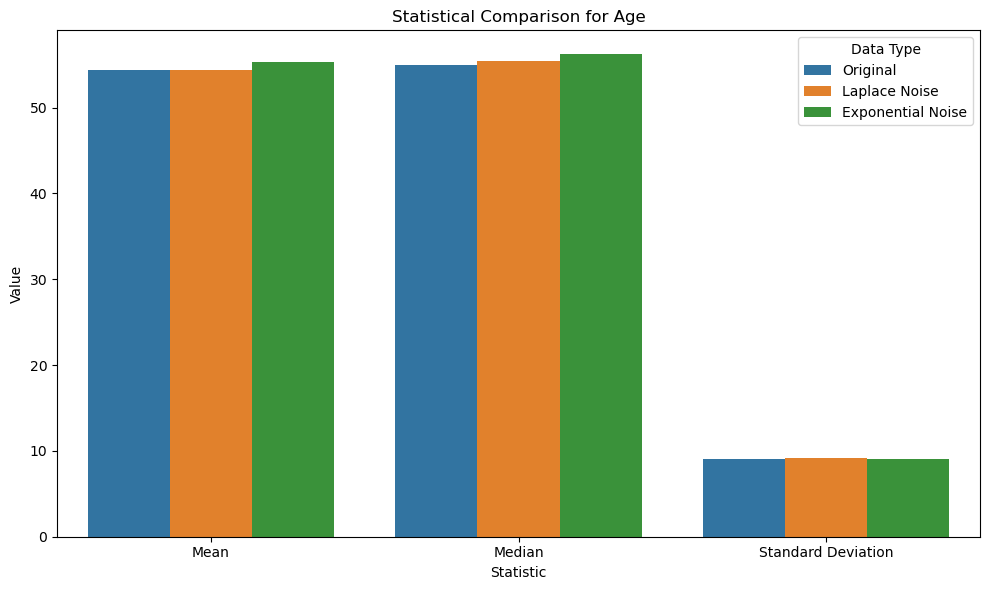

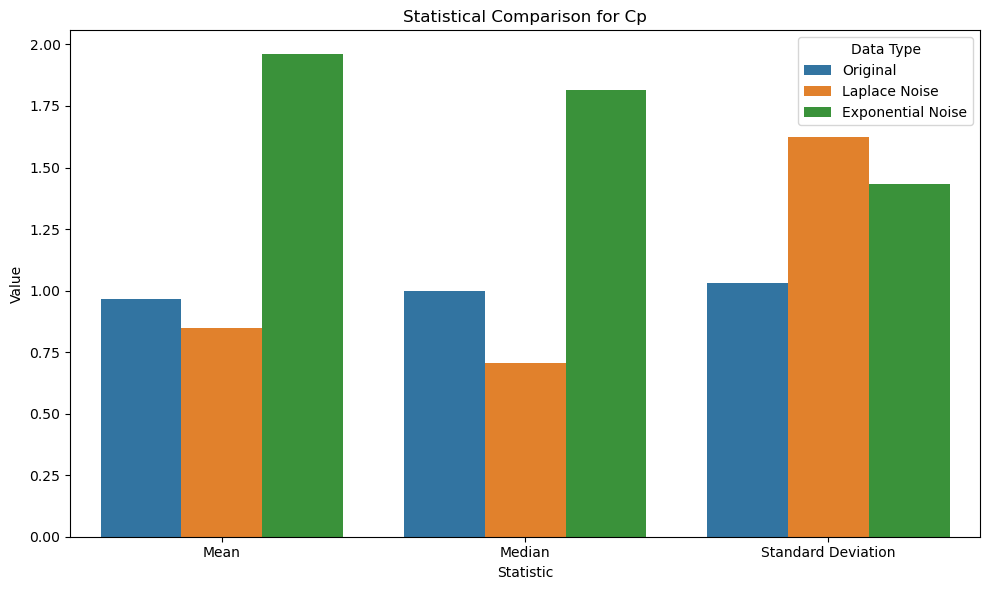

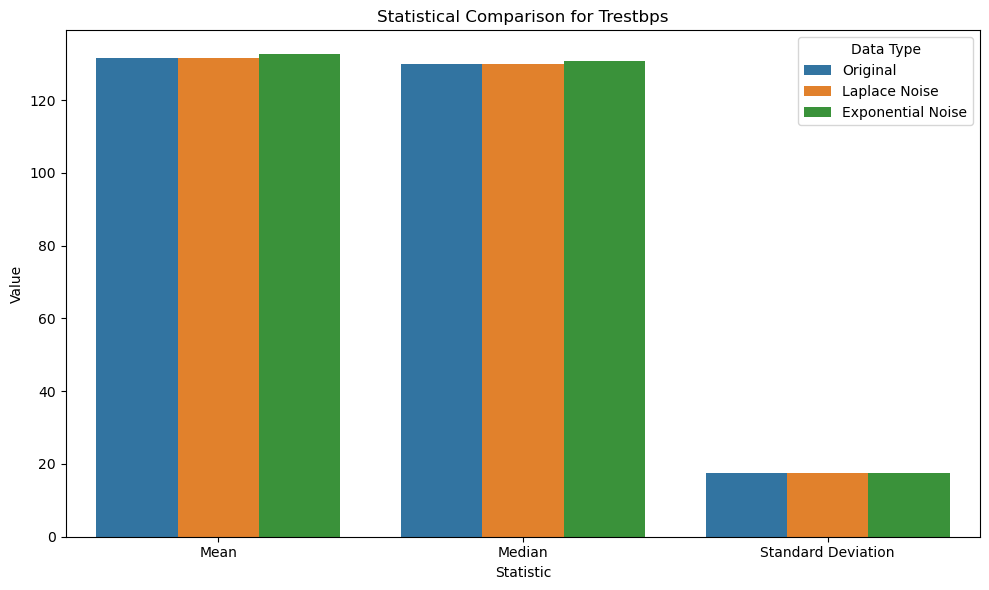

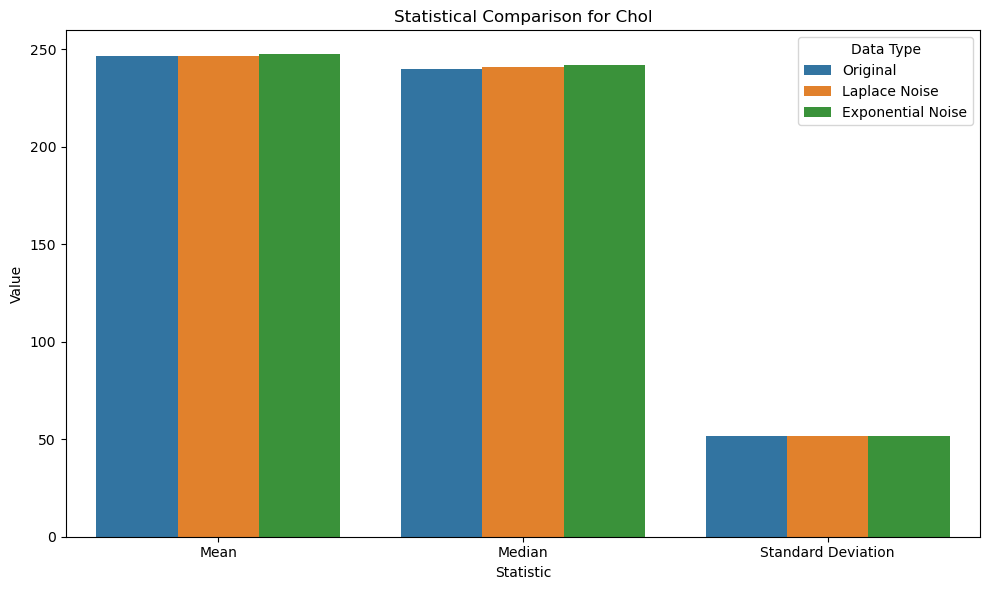

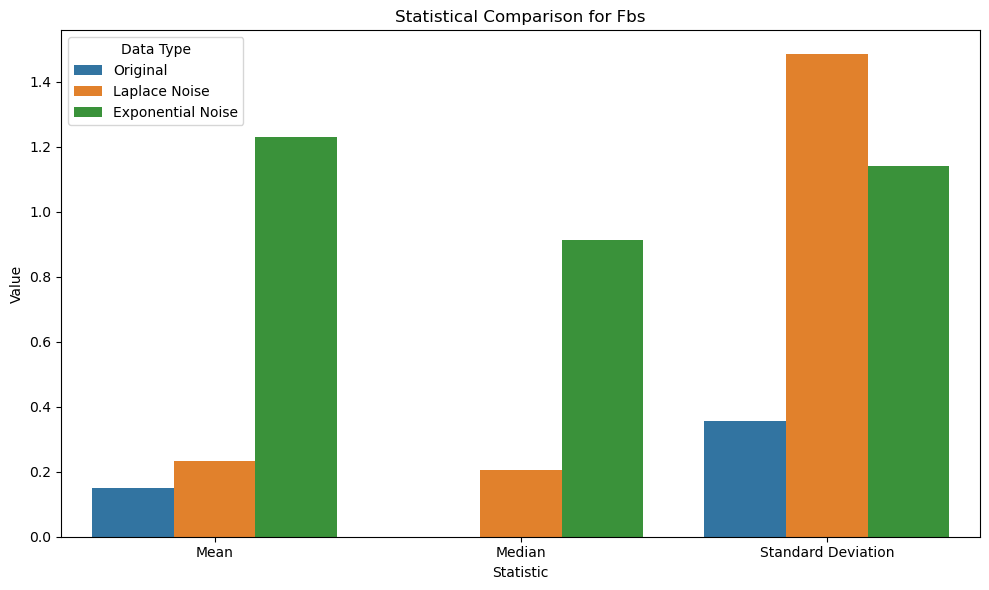

In [24]:
# Function to plot comparison bar plots for each feature
def plot_feature_stats(feature, data):
    feature_data = data[data['Feature'] == feature]
    feature_data_melted = feature_data.melt(id_vars=['Feature', 'Type'], var_name='Statistic', value_name='Value')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Statistic', y='Value', hue='Type', data=feature_data_melted)
    plt.title(f'Statistical Comparison for {feature.capitalize()}')
    plt.xlabel('Statistic')
    plt.ylabel('Value')
    plt.legend(title='Data Type')
    plt.tight_layout()
    plt.show()

# Plotting for each of the first five features
for feature in features:
    plot_feature_stats(feature, combined_stats_df)

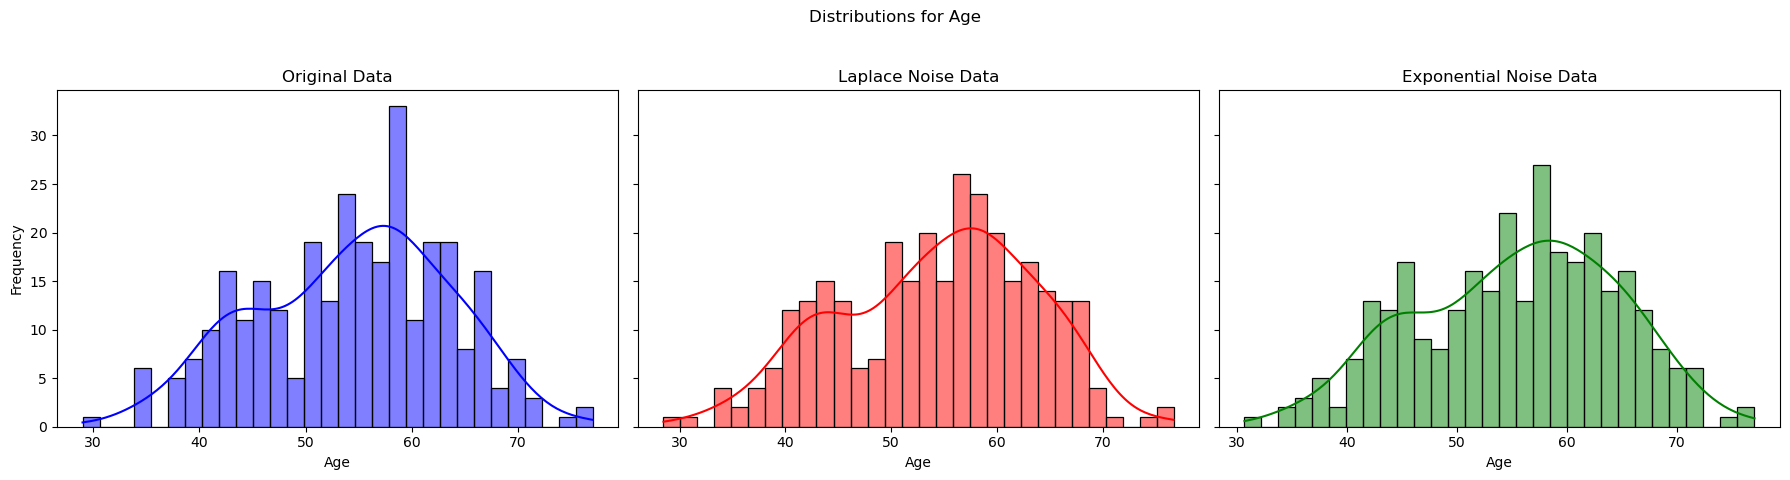

In [28]:
# Function to plot individual histograms for each data type for a feature
def plot_individual_histograms(feature, original_data, laplace_data, exponential_data):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    fig.suptitle(f'Distributions for {feature.capitalize()}')
    
    # Original data histogram
    plt.subplot(1, 3, 1)
    sns.histplot(original_data, ax=axes[0], color="blue", kde=True, bins=30)
    axes[0].set_title('Original Data')
    axes[0].set_xlabel(feature.capitalize())
    axes[0].set_ylabel('Frequency')
    
    # Laplace noise data histogram
    plt.subplot(1, 3, 2)
    sns.histplot(laplace_data, ax=axes[1], color="red", kde=True, bins=30)
    axes[1].set_title('Laplace Noise Data')
    axes[1].set_xlabel(feature.capitalize())
    axes[1].set_ylabel('Frequency')
    
    # Exponential noise data histogram
    plt.subplot(1, 3, 3)
    sns.histplot(exponential_data, ax=axes[2], color="green", kde=True, bins=30)
    axes[2].set_title('Exponential Noise Data')
    axes[2].set_xlabel(feature.capitalize())
    axes[2].set_ylabel('Frequency')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    
# Generating separate histograms for the 'Age' feature
plot_individual_histograms('age', df['age'], apply_laplace_mechanism(df['age'], 1), apply_exponential_mechanism(df['age'], 1))



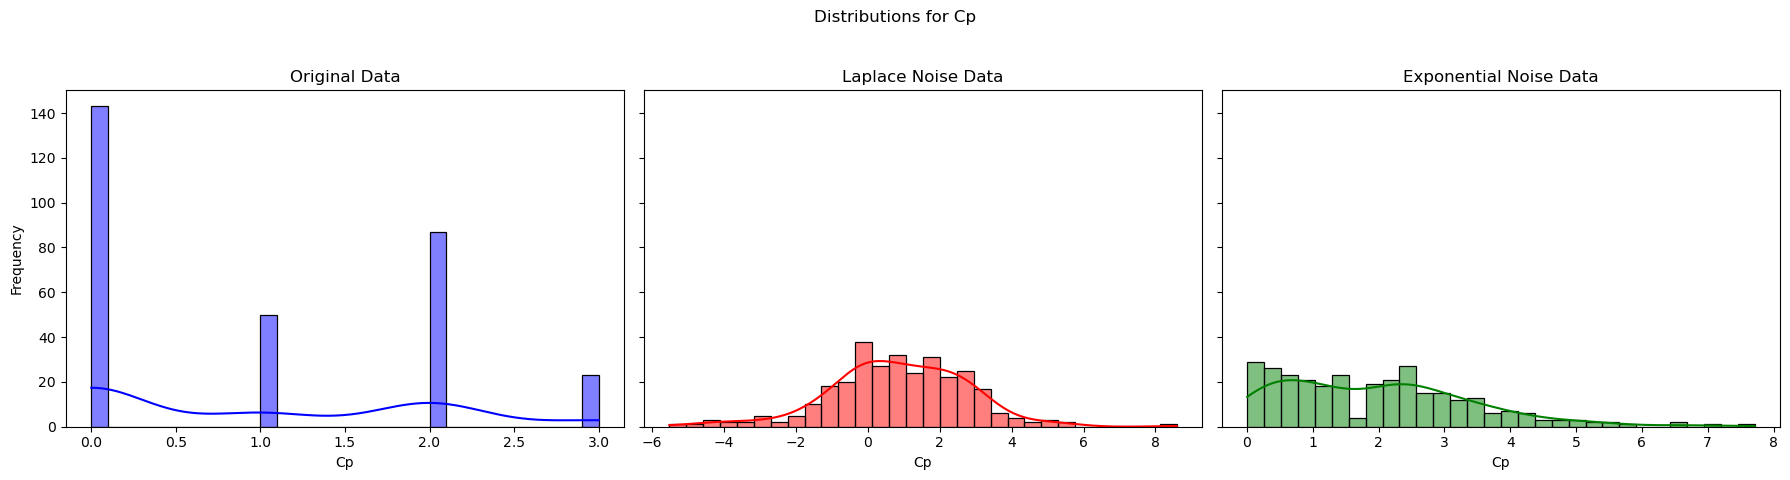

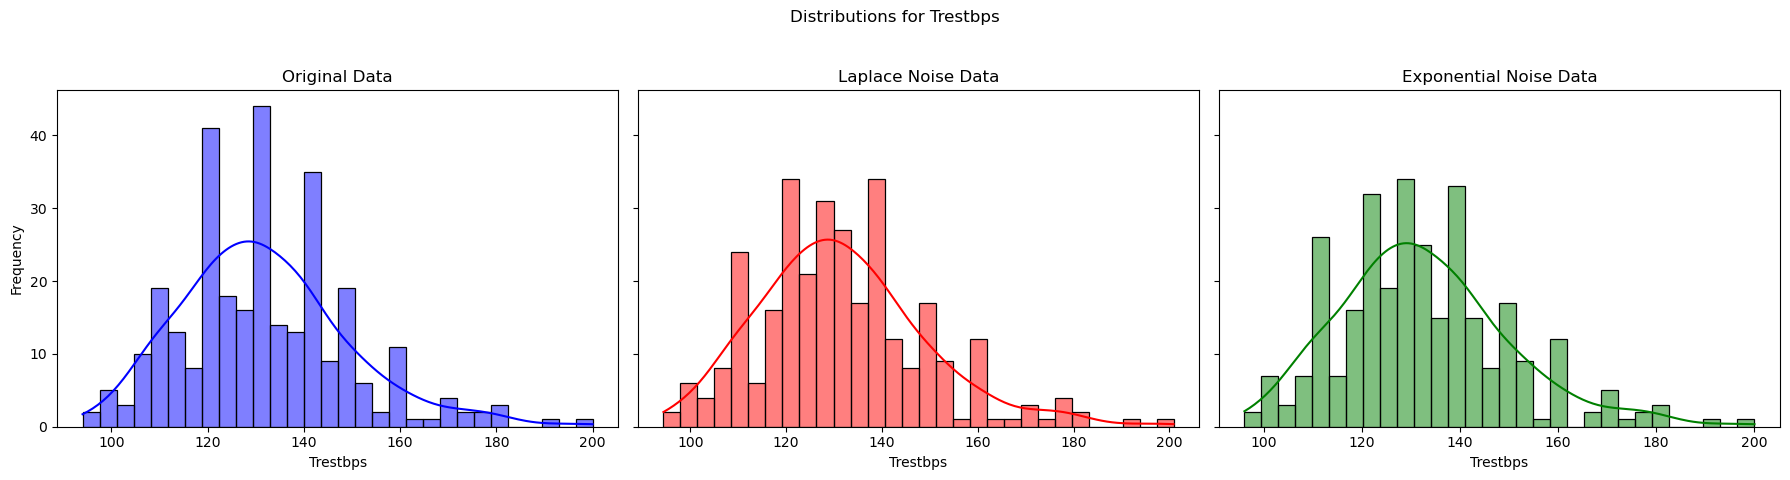

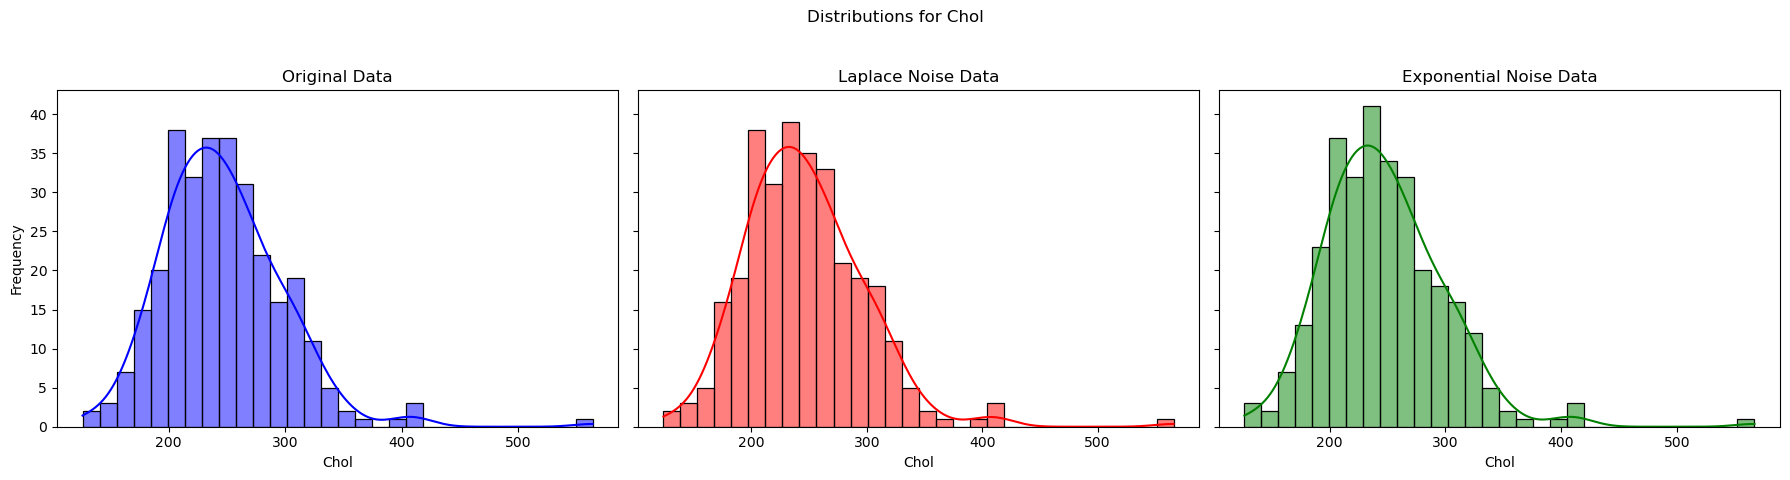

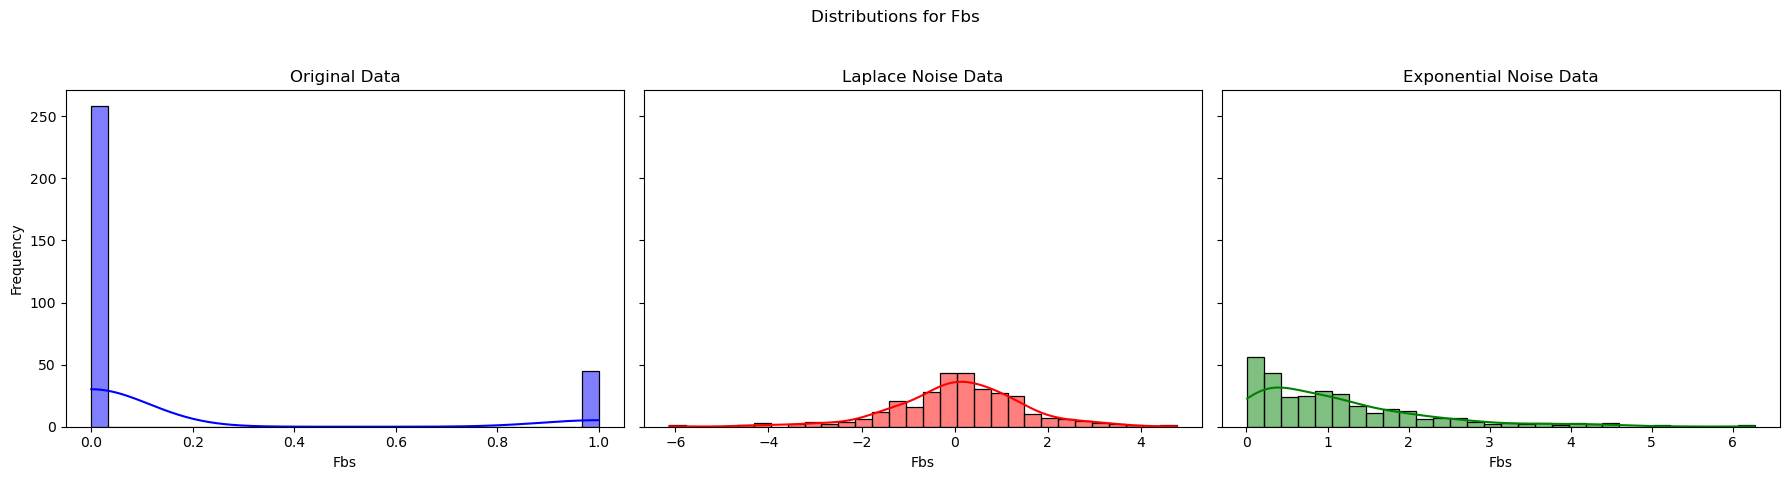

In [32]:
# Looping through each feature to generate histograms
for feature in features[1:]:  # Skipping 'age' as it's already done
    original_data = df[feature]
    laplace_data = apply_laplace_mechanism(original_data, 1)
    exponential_data = apply_exponential_mechanism(original_data, 1)
    
    plot_individual_histograms(feature, original_data, laplace_data, exponential_data)